# Ćwiczenie 1b
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


# Implementacja metody gradientu prostego

In [ ]:
from typing import Callable, Tuple
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10, color='red')

    def calculate_func_value(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        gradient = self.calculate_func_grad(x1, x2)

        new_x1 = x1 - self.alpha * gradient[0]
        new_x2 = x2 - self.alpha * gradient[1]

        return (new_x1, new_x2)

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        self.trace = np.empty(shape = [0,2])

        x1 = x1_init
        x2 = x2_init

        for step in range(steps):
            self.trace = np.append(self.trace, [[x1,x2]], axis = 0)
            x1, x2 = self.gradient_descent_step(x1, x2)

            if verbose > 0:
                print(f"Step {step}: x1={x1}, x2={x2}, f(x1,x2)={self.calculate_func_value(x1, x2)}")
            if verbose > 1:
                print(f"\tgradient(x1,x2)={self.calculate_func_grad(x1,x2)}")

        if plot:
          self.plot_func()

        return self.calculate_func_value(x1, x2)

# Przeszukiwanie podanych funkcji
## Funkcja 1
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}
\
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

In [ ]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

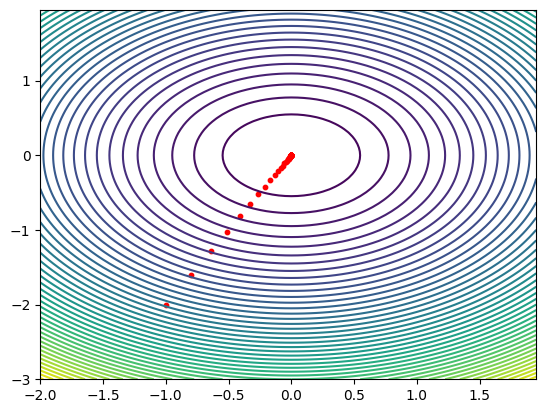

In [ ]:
def f(x1, x2):
  return x1**(2) + x2**(2)

def f_grad(x1, x2):
  return (2*x1, 2*x2)

f_gradient_descent = SimpleGradientDescent(f, f_grad, 0.1)
f_gradient_descent.minimize(-1,-2, 150, 0, True);

## Funkcja 2
\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
\
\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [ ]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

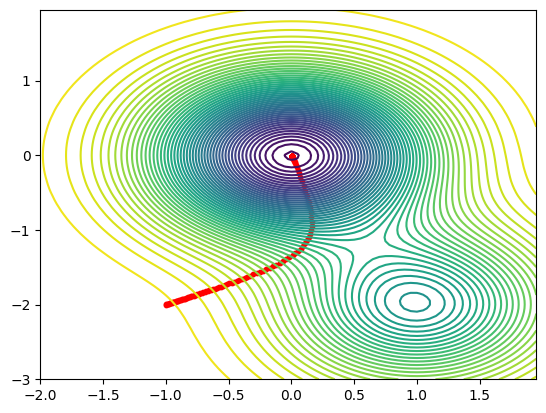

In [ ]:
def g(x1, x2):
  return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

def g_grad(x1, x2):
  return (2*x1*np.exp(-x1**(2)-x2**(2)) + (x1-1)*np.exp(-(x1-1)**(2) - (x2+2)**(2)),
          2*x2*np.exp(-x1**(2)-x2**(2)) + (x2+2)*np.exp(-(x1-1)**(2) - (x2+2)**(2)))

g_gradient_descent = SimpleGradientDescent(g, g_grad, 0.1)
g_gradient_descent.minimize(-1,-2, 150, 0, True);

# Wpływ rozmiaru kroku

In [ ]:
# Random point
random_x1 = np.random.uniform(-2,2)
random_x2 = np.random.uniform(-3,2)

Sprawdzam wynik minimalizacji dla różnej długości kroków (0.1, 0.5, 1.0), \
liczbę kroków w każdym przypadku ustawiam na 15.

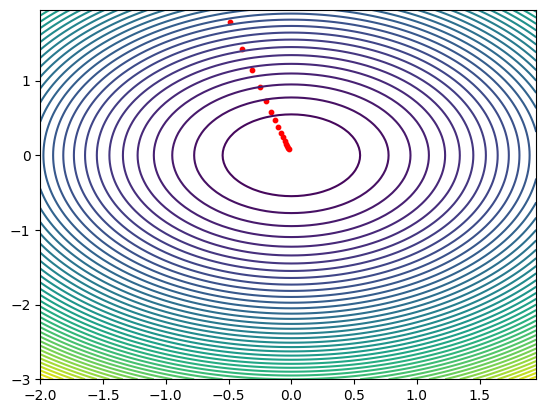

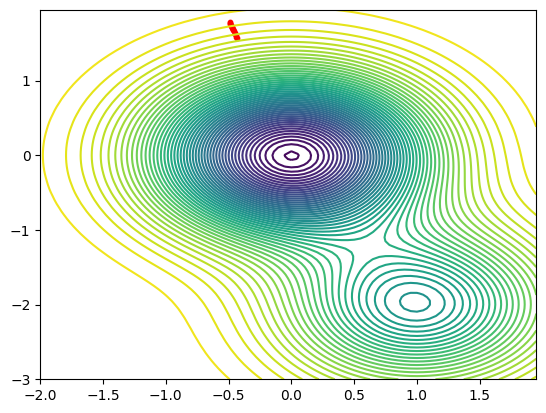

In [ ]:
alpha = 0.1

f_gradient_descent = SimpleGradientDescent(f, f_grad, alpha)
f_gradient_descent.minimize(random_x1, random_x2, 15, 0, True);

g_gradient_descent = SimpleGradientDescent(g, g_grad, alpha)
g_gradient_descent.minimize(random_x1,random_x2, 15, 0, True);

W tym przypadku (alpha = 0.1), w funkcji f(x) zostało znalezione minimum lokalne w 15 krokach, ale w funkcji g(x), 15 kroków o długości 0.1 było niewystarczające

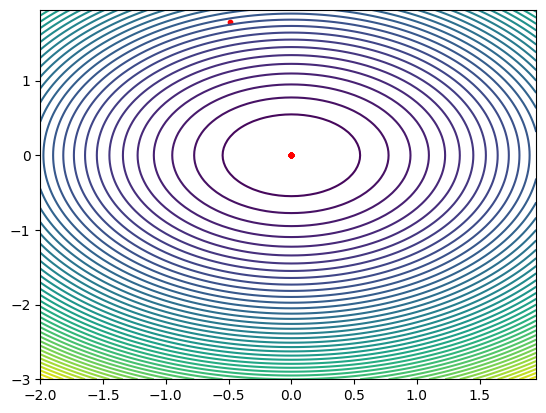

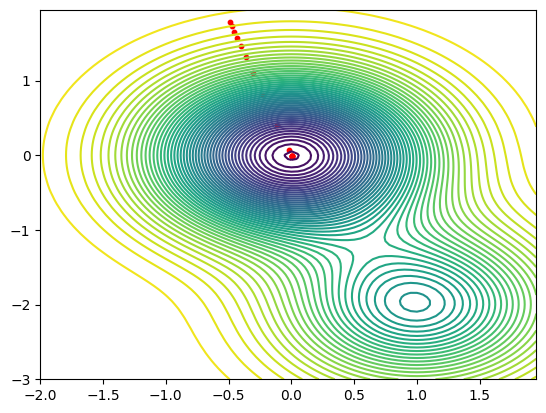

In [ ]:
alpha = 0.5

f_gradient_descent = SimpleGradientDescent(f, f_grad, alpha)
f_gradient_descent.minimize(random_x1, random_x2, 15, 0, True);

g_gradient_descent = SimpleGradientDescent(g, g_grad, alpha)
g_gradient_descent.minimize(random_x1,random_x2, 15, 0, True);

W drugim przypadku (alpha = 0.5), w obu przypadkach udało się znaleść minimum lokalne, na wykresie widać, że w przypadku funkcji f(x) minimum zostało znalezione już w 2 kroku.

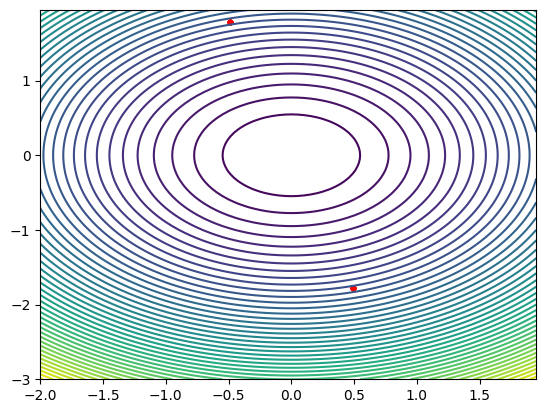

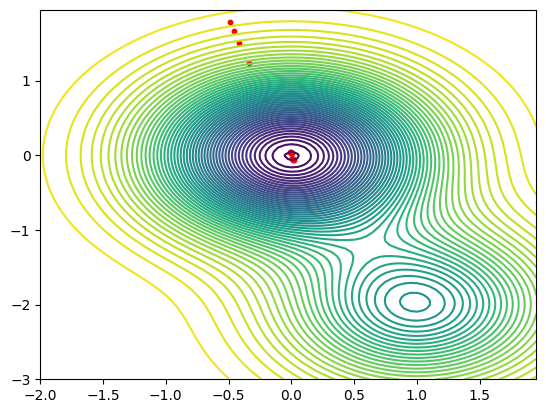

In [ ]:
alpha = 1.0

f_gradient_descent = SimpleGradientDescent(f, f_grad, alpha)
f_gradient_descent.minimize(random_x1, random_x2, 15, 0, True);

g_gradient_descent = SimpleGradientDescent(g, g_grad, alpha)
g_gradient_descent.minimize(random_x1,random_x2, 15, 0, True);

W ostatnim prypadku (alfa = 1.0), krok jest widocznie zbyt duży, algorytm nie trafił w minima lokalne sprawdzanych funkcji

## Wnioski

Jak widać na podanych wyżej przykładach, długość kroku powinn abyć optymalnie dobrana, zbyt mała długość, może powodować potrzebę przejścia bardzo dużej ilości kroków, zbyt mała długość kroku, może jednak spowodować nie trafienie w minimum lokalne.